In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import operator
import random
import time

In [2]:
def open_plain_txt(path):
    file = open(path, 'r')
    text = file.read()
    file.close()
    return text

def get_params(lst):
    lst = list(filter(None, lst))
    for i in range(len(lst)):
        lst[i] = int(lst[i])
    return lst

def parse_input(path):
    text = open_plain_txt(path)
    text = text.split('\n')
    params = text[0].split(' ')
    params = get_params(params)
    pizzas = text[1:]
    pizzas = list(filter(None,pizzas))
    objs = []
    for i in range(len(pizzas)):
        objs.append(Pizza(i, pizzas[i].split(' ')))
        
    return params, objs

def get_all_ing(pizza_list):
    all_ingredients = set()
    for i in range(len(pizza_list)):
        all_ingredients = all_ingredients | set(pizza_list[i].ingredients)
    return all_ingredients

def min_extra_groups(excess):
    mod = excess%4
    num_twos = 0
    num_threes = 0
    num_fours = 0
    groups_data = [0,0,0]
    if mod:
        if mod == 1:
            num_fours = int(excess/4)-1
            num_threes = 1
            num_twos = 1
        elif mod == 2:
            num_fours = int(excess/4)
            num_twos = 1
        elif mod == 3:
            num_fours = int(excess/4)
            num_threes = 1
    else:
        num_fours = int(excess/4)
    groups_data[0] = num_twos
    groups_data[1] = num_threes
    groups_data[2] = num_fours
    return groups_data

def max_extra_groups(excess):
    mod = excess%2
    num_twos = 0
    num_threes = 0
    groups_data = [0,0,0]
    if mod:
        num_twos = int(excess/2) - 1
        num_threes = 1
    else:
        num_twos = int(excess/2)
    groups_data[0] = num_twos
    groups_data[1] = num_threes
    return groups_data

def exercise_info(params, pizza_list):
    pizza_amount = params[0]
    T2 = params[1]
    T3 = params[2]
    T4 = params[3]
    all_groups = T2 + T3 + T4
    pizzas_needed = T2 * 2 + T3 * 3 + T4 * 4
    excess = pizzas_needed - pizza_amount
    all_ingredients = get_all_ing(pizza_list)
    
    print(f'Доступно пицц: {pizza_amount}')
    print(f'Групп из 2-х человек: {T2}')
    print(f'Групп из 3-х человек: {T3}')
    print(f'Групп из 4-х человек: {T4}\n')
    print(f'Количество пицц, нужных, чтобы накормить все группы: {pizzas_needed}\n')
    print(f'Всего уникальных ингридиентов {len(all_ingredients)}')

In [3]:
def sort_pizza_list(pizza_list):
    sorted_pizzas = sorted(pizza_list, key=operator.attrgetter('num_ing'))
    return sorted_pizzas

Классы

In [4]:
class Pizza():
    def __init__(self, idx, lst):
        self.idx = idx
        self.num_ing = int(lst[0])
        self.ingredients = lst[1:]

class Result():
    def __init__(self):
        self.point = 0
        self.pizzas = []
        self.player = 0

In [5]:
params, pizza_list = parse_input('e_many_teams.in')
sorted_pizza = sort_pizza_list(pizza_list)

всего игредиетов = 399776
Минимальное кол-во ингредиетов = 1
Максимальное кол-во ингредиетов = 38
Доступно пицц: 100000
Групп из 2-х человек: 39748
Групп из 3-х человек: 49195
Групп из 4-х человек: 29832

Количество пицц, нужных, чтобы накормить все группы: 346409

Всего уникальных ингридиентов 100


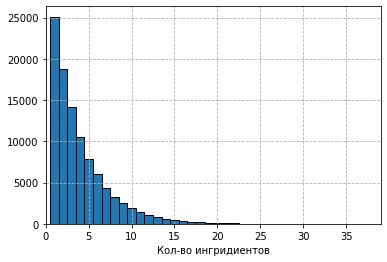

In [6]:
#Сколько всего ингредиетов
summ = 0
for s_p in sorted_pizza:
    summ += len(s_p.ingredients)
print(f'всего игредиетов = {summ}')

#Вывод полезых значений
max_igr_in_pizza = sorted_pizza[0]
min_igr_in_pizza = sorted_pizza[-1]
print(f'Минимальное кол-во ингредиетов = {len(max_igr_in_pizza.ingredients)}')
print(f'Максимальное кол-во ингредиетов = {len(min_igr_in_pizza.ingredients)}')

#Гистограмма распределения количества ингридиентов.
nums = []
for i in range(params[0]):
    nums.append(pizza_list[i].num_ing)

plt.figure(1)
plt.clf()
plt.hist(nums, bins=np.arange(min(nums), max(nums)+2), align = 'left', edgecolor = 'black')
plt.grid(linestyle = '--')
plt.xlim(0,max(nums)+1)
plt.xlabel('Кол-во ингридиентов')
exercise_info(params, pizza_list)